In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_excel("Sample.xls")

In [3]:
df = df.sort_values(by=['Order Date'])
df['day'] = df['Order Date'].dt.day
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['month'] = df['Order Date'].dt.month_name(locale = 'English')

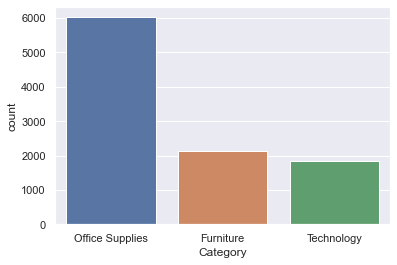

In [4]:
#Total Products by category
ax = sns.countplot(x="Category", data=df)

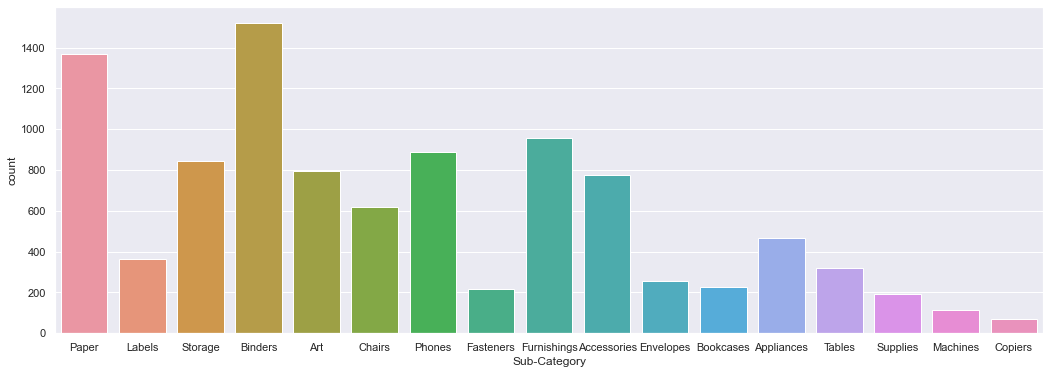

In [5]:
# Total Products by Sub Category
sns.set(rc={'figure.figsize':(17.7,6)})
ax = sns.countplot(x="Sub-Category", data=df)

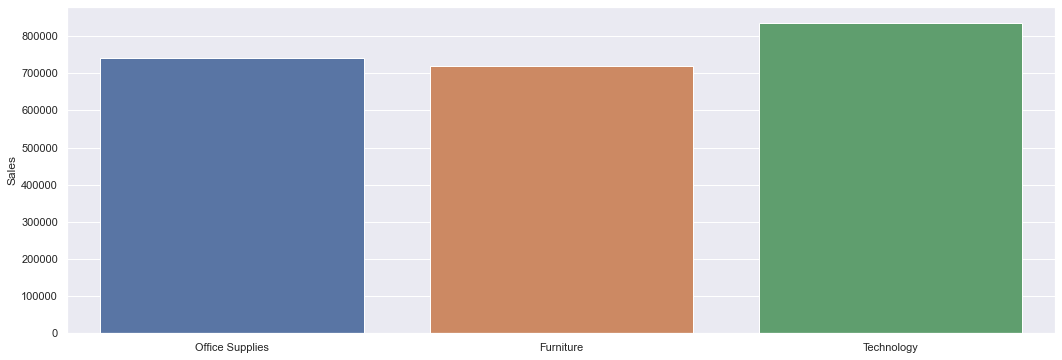

In [6]:
# Total Sales by Category
sns.barplot(x=df.Category.unique(),
                 y=df.groupby(['Category'])['Sales'].sum())
plt.show()

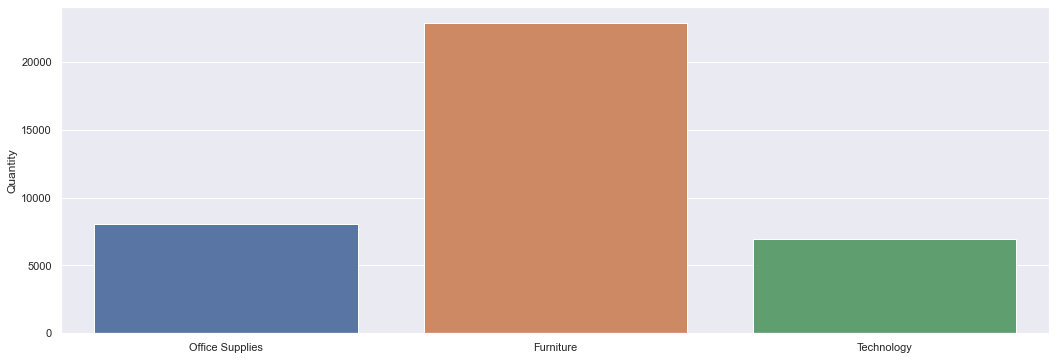

In [7]:
# Total Quantity Sold by Category
sns.barplot(x=df.Category.unique(),
                 y=df.groupby(['Category'])['Quantity'].sum())
plt.show()

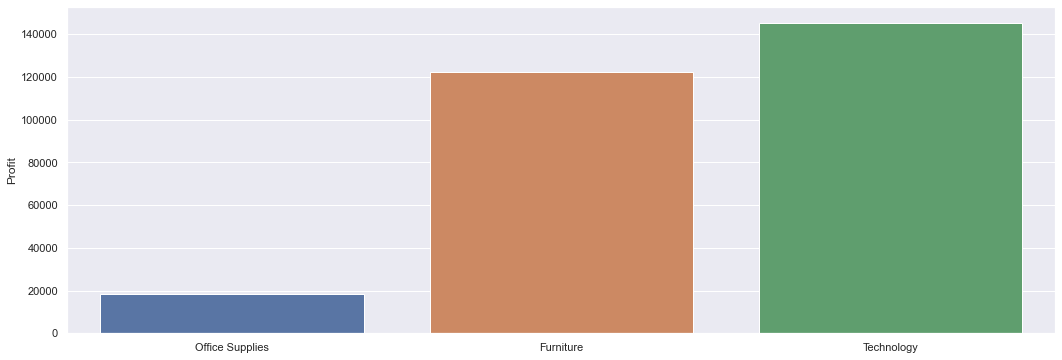

In [8]:
# Total Profit by Category
sns.barplot(x=df.Category.unique(),
                 y=df.groupby(['Category'])['Profit'].sum())
plt.show()

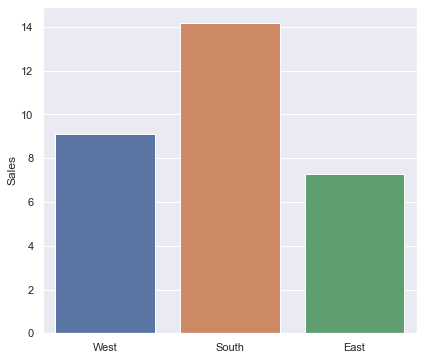

In [9]:
sns.set(rc={'figure.figsize':(6.7,6)})

product_x = df.loc[df['Product Name'] == "Newell 322"]
ax = sns.barplot(x=product_x.Region.unique(),
                 y=product_x.groupby(['Region'])['Sales'].sum())

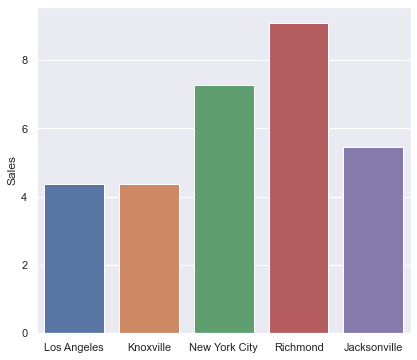

In [10]:
product_x = df.loc[df['Product Name'] == "Newell 322"]
ax = sns.barplot(x=product_x.City.unique(),
                 y=product_x.groupby(['City'])['Sales'].sum())

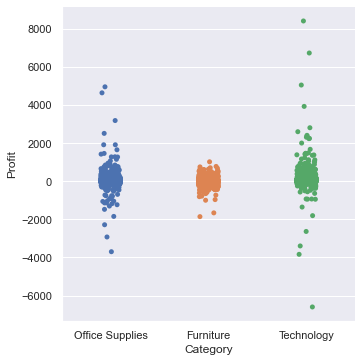

In [11]:
sns.catplot(x="Category", y="Profit", data=df)
plt.show()

In [22]:
df_pivot = pd.pivot_table(df, values='Profit', index='year', columns='month', aggfunc='sum')
df_pivot = df_pivot[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
df_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2014,2450.1907,862.3084,498.7299,3488.8352,2738.7096,4976.5244,-841.4826,5318.1050,8328.0994,3448.2573,9292.1269,8983.5699
2015,-3281.0070,2813.8508,9732.0978,4187.4962,4667.8690,3335.5572,3288.6483,5355.8084,8209.1627,2817.3660,12474.7884,8016.9659
2016,2824.8233,5004.5795,3611.9680,2977.8149,8662.1464,4750.3781,4432.8779,2062.0693,9328.6576,16243.1425,4011.4075,17885.3093
2017,7140.4391,1613.8720,14751.8915,933.2900,6342.5828,8223.3357,6952.6212,9040.9557,10991.5556,9275.2755,9690.1037,8483.3468


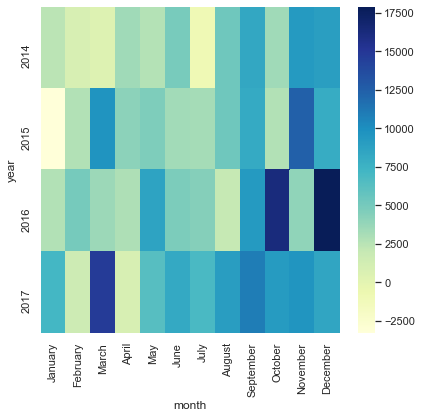

In [31]:
sns.heatmap(df_pivot, cmap="YlGnBu")
plt.show()

In [38]:
top_customers = df['Customer ID'].value_counts().nlargest(10)
top_customers

WB-21850    37
PP-18955    34
JL-15835    34
MA-17560    34
CK-12205    32
SV-20365    32
JD-15895    32
EH-13765    32
EP-13915    31
ZC-21910    31
Name: Customer ID, dtype: int64